<a href="https://colab.research.google.com/github/malithjkd/AI_ML/blob/main/Self_Learn/CNN_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Codebasic tutoral 

https://www.youtube.com/watch?v=7HPwo4wnJeA&t=521s



In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [12]:
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


170500096/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [13]:
print(x_train[1].shape)

(32, 32, 3)


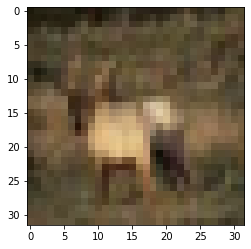

In [14]:
plt.imshow(x_train[3])

In [15]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [16]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [17]:
#classes = ["airplain","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [18]:
#classes[0]

In [19]:
def plot_sample(x,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(x[index])
  #plt.xlabel(classes[y[index]])


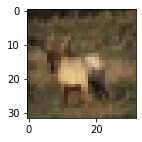

In [20]:
plot_sample(x_train,y_train,3)

To nomalize the values

In [21]:
x_train = x_train / 255
x_test = x_test / 255


Creating ANN to tryout things in ANN

In [22]:
ann = models.Sequential([
                         layers.Flatten(input_shape=(32,32,3)),
                         layers.Dense(300, activation='relu'),
                         layers.Dense(100, activation='relu'),
                         layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

ann.fit(x_train, y_train, epochs=5)
ann.summary()

Epoch 1/5
1563/1563 [==============================] - 7s 2ms/step - loss: 1.8733 - accuracy: 0.3285
Epoch 2/5
1563/1563 [==============================] - 4s 2ms/step - loss: 1.6891 - accuracy: 0.4016
Epoch 3/5
1563/1563 [==============================] - 4s 2ms/step - loss: 1.6124 - accuracy: 0.4279
Epoch 4/5
1563/1563 [==============================] - 4s 2ms/step - loss: 1.5573 - accuracy: 0.4473
Epoch 5/5
1563/1563 [==============================] - 4s 2ms/step - loss: 1.5117 - accuracy: 0.4643
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 300)               921900    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_____________

In [23]:
ann.evaluate(x_test, y_test)


313/313 [==============================] - 1s 2ms/step - loss: 1.5167 - accuracy: 0.4609


[1.5167219638824463, 0.4609000086784363]

In [24]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print(y_pred_classes)
#classification_report(y_test, y_pred_classes)
print('Classification report:\n', classification_report(y_test, y_pred_classes))


[3, 8, 8, 8, 4, 6, 3, 4, 3, 1, 8, 9, 1, 7, 1, 8, 7, 3, 8, 6, 4, 2, 0, 1, 4, 2, 6, 0, 1, 6, 6, 5, 4, 3, 9, 1, 2, 1, 3, 5, 0, 6, 9, 4, 0, 0, 3, 8, 4, 4, 9, 8, 6, 3, 8, 8, 7, 6, 3, 2, 4, 3, 7, 9, 3, 2, 1, 2, 5, 9, 2, 7, 8, 8, 0, 2, 9, 5, 3, 8, 8, 1, 1, 2, 2, 9, 8, 8, 8, 8, 0, 4, 8, 2, 4, 3, 4, 0, 2, 7, 7, 4, 5, 3, 1, 1, 5, 6, 8, 5, 6, 2, 6, 2, 9, 3, 0, 8, 2, 7, 8, 4, 1, 2, 0, 1, 8, 5, 3, 3, 7, 1, 1, 9, 1, 3, 9, 7, 6, 8, 2, 1, 3, 5, 8, 2, 7, 5, 5, 5, 8, 1, 8, 8, 0, 5, 2, 8, 3, 0, 2, 7, 1, 4, 8, 7, 8, 6, 3, 0, 0, 7, 0, 8, 9, 9, 0, 7, 3, 0, 8, 7, 6, 8, 3, 8, 6, 3, 7, 0, 6, 3, 3, 1, 7, 4, 8, 2, 7, 8, 3, 8, 0, 2, 1, 5, 8, 5, 7, 8, 3, 1, 3, 7, 8, 2, 8, 9, 0, 7, 2, 3, 8, 3, 3, 9, 9, 2, 3, 2, 3, 1, 3, 1, 8, 0, 4, 0, 6, 3, 1, 8, 7, 8, 0, 5, 7, 0, 5, 1, 2, 3, 6, 7, 2, 0, 3, 1, 8, 1, 5, 1, 6, 3, 0, 8, 8, 4, 7, 2, 2, 3, 6, 5, 8, 5, 0, 7, 2, 5, 9, 4, 3, 1, 8, 9, 1, 8, 7, 9, 1, 2, 6, 8, 3, 2, 4, 0, 0, 4, 6, 6, 2, 5, 4, 8, 0, 2, 1, 4, 8, 6, 0, 0, 2, 2, 7, 7, 5, 3, 5, 5, 6, 5, 3, 5, 2, 3, 0, 3, 4, 9, 6, 

# CNN

In [25]:
cnn = models.Sequential([
                         #CNN
                         layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape = (32,32,3)),
                         layers.MaxPooling2D((2,2)),
                         layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
                         layers.MaxPooling2D((2,2)),

                         # Dense layer
                         layers.Flatten(),
                         layers.Dense(64, activation='relu'),
                         layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [26]:
history = cnn.fit(x_train, y_train, epochs=13)
cnn.summary()

Epoch 1/13
1563/1563 [==============================] - 33s 3ms/step - loss: 1.4883 - accuracy: 0.4649
Epoch 2/13
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1094 - accuracy: 0.6116
Epoch 3/13
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9712 - accuracy: 0.6631
Epoch 4/13
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8883 - accuracy: 0.6908
Epoch 5/13
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8217 - accuracy: 0.7138
Epoch 6/13
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7698 - accuracy: 0.7340
Epoch 7/13
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7172 - accuracy: 0.7500
Epoch 8/13
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6725 - accuracy: 0.7673
Epoch 9/13
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6295 - accuracy: 0.7821
Epoch 10/13
1563/1563 [==============================] - 5s 3ms/step - loss: 0.59

In [27]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print(y_pred_classes)
#classification_report(y_test, y_pred_classes)
print('Classification report:\n', classification_report(y_test, y_pred_classes))

[3, 8, 8, 8, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 0, 9, 4, 2, 4, 0, 9, 6, 6, 5, 4, 6, 9, 3, 7, 9, 9, 5, 2, 6, 3, 6, 0, 9, 3, 3, 7, 6, 7, 8, 6, 3, 8, 8, 3, 7, 5, 3, 7, 3, 6, 3, 6, 2, 1, 0, 9, 0, 2, 6, 8, 8, 0, 2, 2, 3, 3, 8, 8, 0, 1, 7, 2, 7, 3, 2, 9, 9, 0, 2, 8, 6, 4, 6, 6, 0, 0, 7, 4, 5, 6, 3, 1, 1, 3, 6, 3, 7, 4, 0, 6, 2, 1, 3, 0, 4, 3, 7, 8, 3, 1, 2, 8, 0, 8, 3, 5, 8, 2, 1, 8, 9, 1, 2, 7, 7, 2, 8, 3, 5, 6, 5, 0, 2, 6, 5, 5, 5, 8, 9, 6, 0, 0, 5, 2, 9, 5, 4, 2, 1, 2, 6, 0, 7, 8, 6, 9, 0, 9, 9, 9, 0, 9, 9, 3, 7, 5, 0, 0, 5, 2, 6, 0, 8, 6, 2, 6, 8, 5, 5, 0, 7, 7, 5, 8, 8, 7, 8, 5, 0, 8, 7, 1, 3, 0, 5, 7, 9, 3, 9, 5, 7, 8, 2, 2, 9, 8, 4, 7, 3, 9, 4, 4, 9, 3, 2, 3, 6, 3, 1, 5, 1, 8, 0, 4, 0, 5, 3, 1, 1, 1, 9, 0, 2, 1, 8, 2, 0, 5, 5, 9, 3, 2, 0, 3, 0, 8, 9, 8, 1, 2, 5, 0, 8, 2, 4, 7, 0, 2, 5, 6, 3, 8, 2, 0, 3, 4, 3, 9, 0, 6, 1, 0, 9, 1, 8, 7, 9, 1, 2, 6, 1, 2, 2, 6, 0, 2, 6, 6, 6, 5, 2, 2, 1, 8, 2, 9, 2, 8, 6, 8, 0, 4, 0, 7, 5, 6, 7, 3, 5, 2, 2, 7, 1, 7, 5, 4, 6, 1, 9, 3, 

dict_keys(['loss', 'accuracy'])


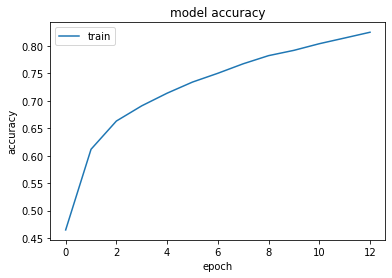

In [28]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

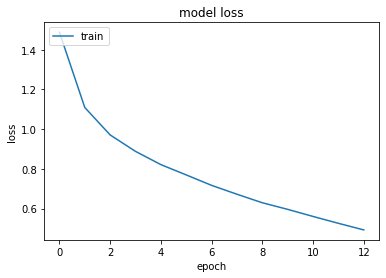

In [29]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()